# **Feature importance**

In [42]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
from matplotlib import rcParams

Cargamos dataset

In [43]:
df = pd.read_csv('/content/performance_clean.csv')
y = df['good_bad_flag']

**Dummies**

In [44]:
#Generamos dummies de las variables categóricas:
dummy_int = pd.get_dummies(df[['interest_interval']], drop_first=True)
dummy_td = pd.get_dummies(df[['termdays']], drop_first=True)
#Añadimos las variables dummies y borramos las categóricas originales:
df = pd.concat([df, dummy_int, dummy_td], axis=1)
df = df.drop(['interest_interval', 'good_bad_flag', 'termdays', 'customerid', 'systemloanid', 'good_bad_flag'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [45]:
df

,loannumber,loanamount,interest,loan_interval,interest_interval_mas de 3000,interest_interval_menos de 3000,termdays_Other
0,12,30000.0,4500.0,10000,1,0,0
1,2,15000.0,2250.0,10000,0,1,0
2,7,20000.0,2250.0,10000,0,1,1
3,3,10000.0,1500.0,10000,0,1,1
4,9,40000.0,4000.0,10000,1,0,0
...,...,...,...,...,...,...,...
4277,2,10000.0,3000.0,10000,0,0,0
4278,2,10000.0,3000.0,10000,0,0,0
4279,3,10000.0,1500.0,10000,0,1,1
4280,2,10000.0,3000.0,10000,0,0,0


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
sc = StandardScaler()

X = sc.fit_transform(df)


In [48]:
print(np.mean(X))
print(np.var(X))

-1.6356658693349874e-17
0.8571428571428573


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
print(np.mean(X_train))
print(np.var(X_train))

-0.000880201007851742
0.8538594737870813


# **Primer método** (Coeficientes)

In [51]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': df.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

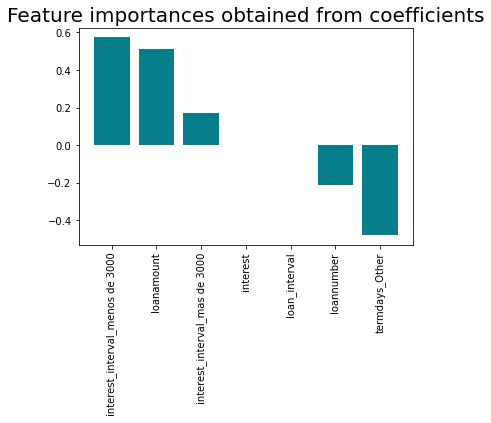

In [52]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# **Segundo método** (Tree based model)




In [53]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': df.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

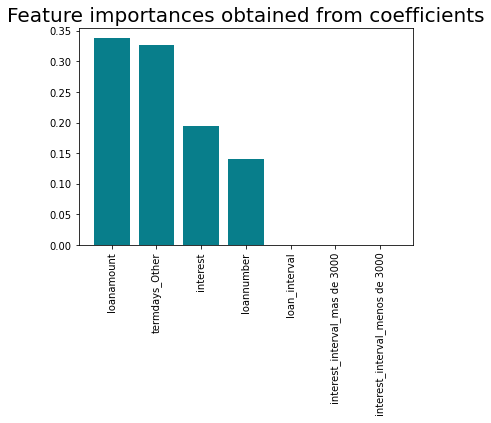

In [54]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()